# Electricity Bills Regression

### import libraries

https://www.kaggle.com/datasets/gireeshs/household-monthly-electricity-bill

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### read data

In [2]:
df = pd.read_csv('./Household energy bill data.csv')
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3.0,3.0,742.57,1,1,1,9675.93,2,0,560.481447
1,1.0,5.0,952.99,0,1,0,35064.79,1,1,633.283679
2,3.0,1.0,761.44,1,1,1,22292.44,0,0,511.879157
3,0.0,5.0,861.32,1,1,0,12139.08,0,0,332.992035
4,1.0,8.0,731.61,0,1,0,17230.10,2,1,658.285625


### check for missing values

In [3]:
df.isnull().sum()

num_rooms             5
num_people            4
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    6
num_children          0
is_urban              0
amount_paid           0
dtype: int64

### fill missing values

In [ ]:
df['num_people'] = df['num_people'].interpolate(method='linear')
df['num_rooms'] = df['num_rooms'].interpolate(method='linear')
df['ave_monthly_income'] = df['ave_monthly_income'].interpolate(method='linear')


In [5]:
df.isnull().sum()

num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64

### show boxblot

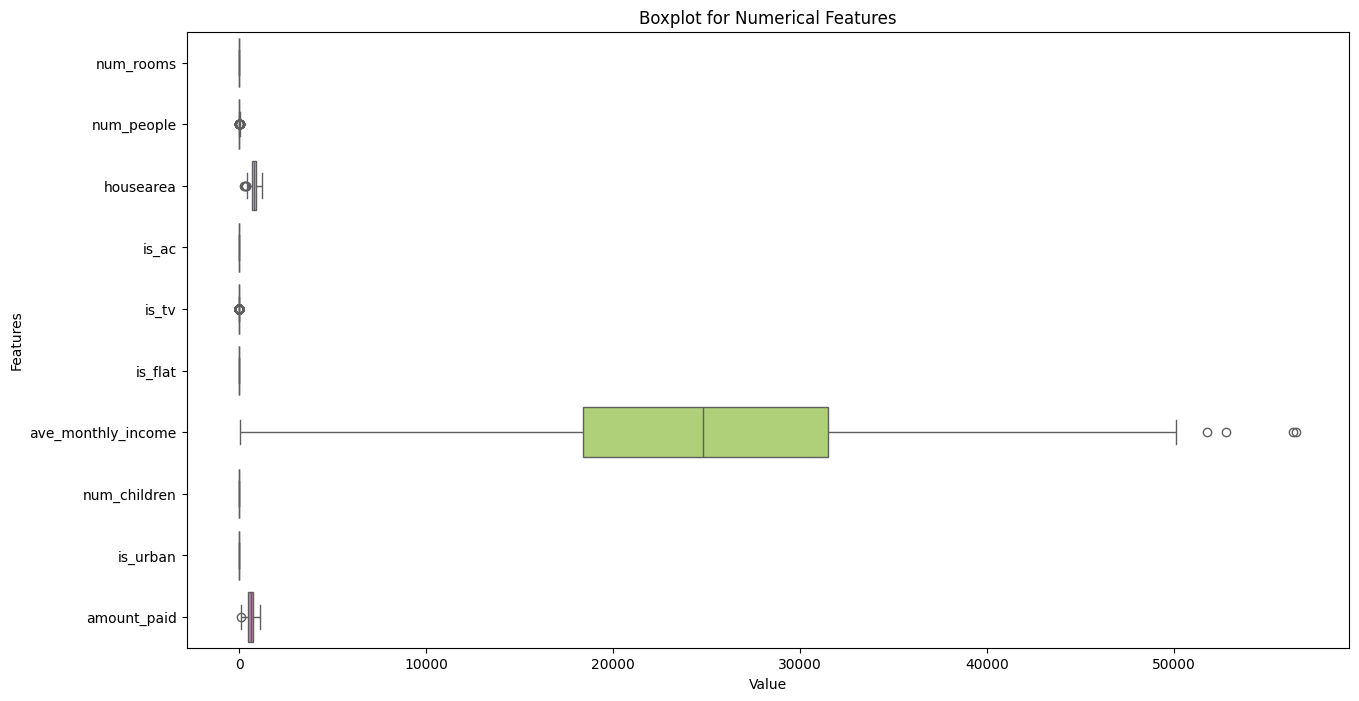

In [6]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set3')
plt.title('Boxplot for Numerical Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

In [7]:
df.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.977000,4.920500,794.703420,0.376000,0.798000,0.477000,24859.174005,1.078000,0.608000,600.396359
std,1.008954,1.973531,147.771736,0.484622,0.401693,0.499721,9511.197888,0.934232,0.488441,181.406210
min,0.000000,0.000000,244.400000,0.000000,0.000000,0.000000,37.780000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18363.002500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24794.980000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31464.822500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


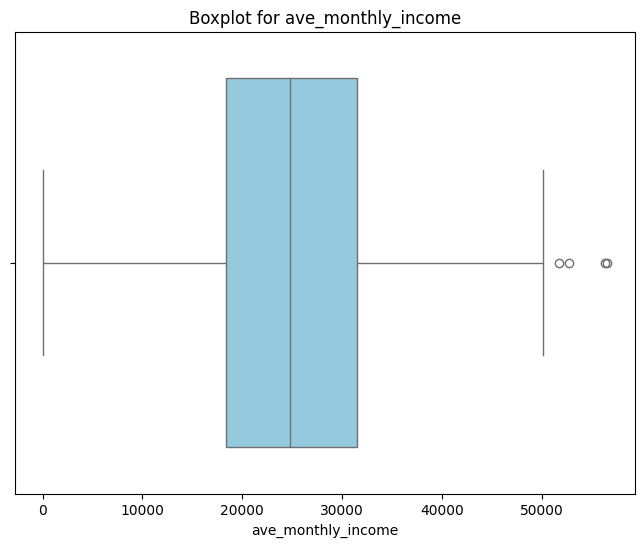

In [8]:
column_to_visualize = 'ave_monthly_income'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_to_visualize], color='skyblue')
plt.title(f'Boxplot for {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.show()


### Remove outliers

In [9]:
columns_to_process = ['num_people','ave_monthly_income','housearea','amount_paid']

print("Original Dataset Shape:", df.shape)

for column in columns_to_process:
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


print("Cleaned Dataset Shape:", df.shape)

Original Dataset Shape: (1000, 10)
Cleaned Dataset Shape: (968, 10)


### Scaling

In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[df.columns] = scaler.fit_transform(df)


### Split data

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop("amount_paid", axis=1)  
y = df["amount_paid"]              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=3349)


### train the liener regression model

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### predict on test data

In [13]:
y_pred = regressor.predict(X_test)

### calculate R2 score

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9177983500772354

### calculate MAE and RMSE

In [15]:

mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.2677564622349671
Root Mean Squared Error (RMSE): 0.31531043514187984


### visualize Actual VS Predicted results

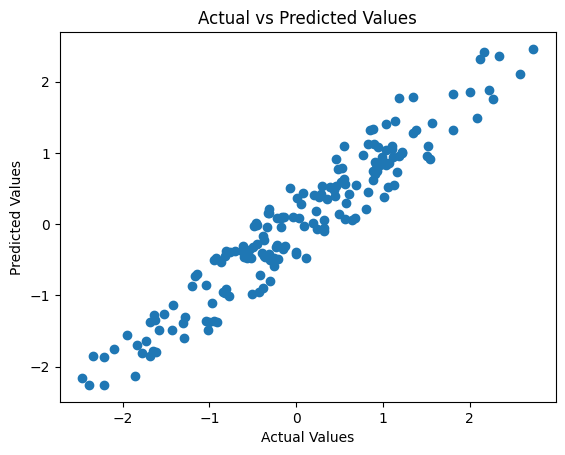

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [17]:
actual_predected = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(actual_predected)

       Actual  Predicted
662  0.529809   0.787577
885  1.182648   0.953663
524 -0.557268  -0.442379
94   0.567106   0.071701
280 -1.683184  -1.855227
..        ...        ...
317  0.354958   0.348101
871  0.807567   0.214373
140  0.296518   0.540301
407 -0.374348  -0.452446
299  1.107366   1.052525

[175 rows x 2 columns]


## Test on unseen data

In [18]:
new_data = {
    "num_rooms": [4],
    "num_people": [4],
    "housearea": [600],
    "is_ac": [0],
    "is_tv": [1],
    "is_flat": [1],
    "ave_monthly_income": [5000],
    "num_children": [2],
    "is_urban": [1]
}

new_df = pd.DataFrame(new_data)

predicted_amount = regressor.predict(new_df)
print("Predicted amount paid:", predicted_amount[0])

Predicted amount paid: 288.1037643385406
